In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)

imputedDataset = pd.read_stata("/Users/burke/Documents/research/bpCog/microsim/microsim/data/fullyImputedDataset.dta")
imputedDataset.head()

,index,WTINT2YR,a1c,age,antiHypertensive,bmi,diedBy2015,gender,hdl,ldl,monthsToDeath,monthsToDeath2,otherLipidLowering,selfReportMI,selfReportMIAge,selfReportStroke,selfReportStrokeAge,statin,timeInUS,tot_chol,trig,ucod,waist,weight,year,anyPhysicalActivity,meanSBP,meanDBP,alcoholPerWeek,raceEthnicity,smokingStatus,education
0,0,102641.406474,5.1,22.0,0.0,23.3,5.397605e-79,1.0,41.0,110.0,61.0,61.0,0.0,0,NaN,0,NaN,0.0,NaN,168.0,84.0,0,81.0,69.2,2011,0,110.666667,74.666667,0.0,3,0,3
1,1,127351.373299,4.9,44.0,0.0,23.2,5.397605e-79,2.0,28.0,151.0,41.0,40.0,0.0,0,NaN,0,NaN,0.0,NaN,190.0,56.0,0,80.1,67.2,2011,1,118.000000,60.000000,14.0,3,0,4
2,2,14391.778470,5.4,21.0,0.0,20.1,5.397605e-79,1.0,43.0,73.0,53.0,52.0,0.0,0,NaN,0,NaN,0.0,NaN,132.0,78.0,0,69.6,54.6,2011,0,124.666667,78.000000,14.0,5,0,3
3,3,26960.774346,5.6,43.0,0.0,33.3,5.397605e-79,2.0,73.0,68.0,45.0,43.0,0.0,0,NaN,0,NaN,0.0,NaN,169.0,141.0,0,120.4,98.6,2011,0,102.000000,71.333333,21.0,4,2,3
4,4,24912.668432,5.0,80.0,1.0,33.9,1.000000e+00,1.0,54.0,122.0,21.0,21.0,0.0,0,NaN,0,NaN,0.0,NaN,203.0,91.0,100,116.5,95.8,2011,0,98.000000,66.000000,7.0,3,0,5


# Now the goal is to see what the risk factors would look like for the NHANES 1999 population, if we advanced them to 2015

For the NHANES side of things, we want the blood pressure distribution in 2015 that excludes people that moved into the coutnry in the prior 16 years (since 1999). 

For the simulation side of things, we'll need to load the mortality data so that we can take out the poeple that died between 1999 and 2015.

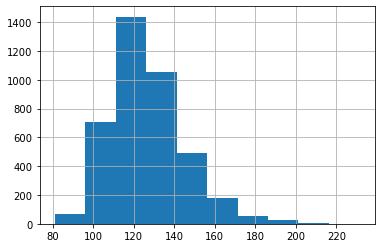

In [2]:
%matplotlib inline
startYear = 1999
endYear = 2015
totalYears = endYear - startYear

noRecentUSInmigration = imputedDataset.loc[~imputedDataset.timeInUS.isin([1,2,3])]
recentCrossSectionOfNonImmigrants = noRecentUSInmigration.loc[noRecentUSInmigration.year==endYear]
# the simulated cohort starts in 1999 and then ages people forward ...so, teh youngest age is 18 + the number of years advanced
recentCrossSectionOfNonImmigrants = recentCrossSectionOfNonImmigrants.loc[recentCrossSectionOfNonImmigrants.age > 18 +totalYears]
recentCrossSectionOfNonImmigrants = recentCrossSectionOfNonImmigrants.sample(n=len(recentCrossSectionOfNonImmigrants), weights=recentCrossSectionOfNonImmigrants.WTINT2YR, replace=True)
recentCrossSectionOfNonImmigrants.meanSBP.hist()

In [3]:
earlyEndYear = 2001
earlyTotalYears = earlyEndYear - startYear

earlyCrossSectionOfNonImmigrants = imputedDataset.loc[imputedDataset.year==earlyEndYear]
# here we just need to throw out the very young people for comparisons
earlyCrossSectionOfNonImmigrants = earlyCrossSectionOfNonImmigrants.loc[earlyCrossSectionOfNonImmigrants.age > 18 + earlyTotalYears]
earlyCrossSectionOfNonImmigrants = earlyCrossSectionOfNonImmigrants.sample(n=len(earlyCrossSectionOfNonImmigrants), weights=earlyCrossSectionOfNonImmigrants.WTINT2YR, replace=True)

print (earlyCrossSectionOfNonImmigrants.meanSBP.describe())

count    5306.000000
mean      123.115278
std        19.363161
min        76.666667
25%       110.000000
50%       119.333333
75%       131.333333
max       224.000000
Name: meanSBP, dtype: float64


# Run a simple simulation with the cohort models (default) starting in 1999 as a comparator

In [4]:
import os
os.chdir("/Users/burke/Documents/research/bpCog/microsim")
from microsim.population import NHANESDirectSamplePopulation

pop = NHANESDirectSamplePopulation(n=50000, year=1999)
pop.advance(totalYears)


processing year: 0
processing year: 1
processing year: 2
processing year: 3
processing year: 4
processing year: 5
processing year: 6
processing year: 7
processing year: 8
processing year: 9
processing year: 10
processing year: 11
processing year: 12
processing year: 13
processing year: 14
processing year: 15


### Compare SBPs between teh simluation and between NHANES

NHANES SBPS
count    4022.000000
mean      126.600613
std        18.075917
min        81.000000
25%       114.000000
50%       124.666667
75%       136.666667
max       231.333333
Name: meanSBP, dtype: float64
Simulation SBPs
: count    43526.000000
mean       123.062562
std         15.935601
min         73.697078
25%        111.906749
50%        120.922746
75%        131.146412
max        211.056533
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean       71.929057
std        11.237242
min        40.000000
25%        64.666667
50%        72.000000
75%        78.666667
max       124.000000
Name: meanDBP, dtype: float64
Simulation SBPs
: count    43526.000000
mean        78.493003
std          9.174137
min         46.253540
25%         72.369097
50%         78.164152
75%         84.404976
max        124.529402
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean        5.809970
std         1.030882
min         4.200000
25%         5.300000
50%         5.600000
75%         5.900000
max        14.200000
Name: a1c, dtype: float64
Simulation SBPs
: count    43526.000000
mean         5.444005
std          0.790346
min          3.930119
25%          5.032116
50%          5.315794
75%          5.629607
max         14.369200
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean       29.905224
std         7.105601
min        14.500000
25%        24.900000
50%        28.800000
75%        33.300000
max        67.300000
Name: bmi, dtype: float64
Simulation SBPs
: count    43526.000000
mean        28.400887
std          6.602859
min         13.406676
25%         23.844280
50%         27.255202
75%         31.542249
max         72.048821
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean      117.238936
std        36.420550
min        22.000000
25%        91.000000
50%       115.000000
75%       139.000000
max       320.000000
Name: ldl, dtype: float64
Simulation SBPs
: count    43526.000000
mean       120.343634
std         30.496974
min          8.252992
25%         99.671456
50%        117.951603
75%        138.170910
max        359.179662
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean       56.253108
std        19.712232
min         6.000000
25%        42.000000
50%        53.000000
75%        68.000000
max       226.000000
Name: hdl, dtype: float64
Simulation SBPs
: count    43526.000000
mean        50.690864
std         15.700868
min          7.838239
25%         39.570091
50%         48.217772
75%         59.217794
max        137.262495
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean      130.239433
std       106.096037
min        19.000000
25%        71.000000
50%       101.000000
75%       155.000000
max      1330.000000
Name: trig, dtype: float64
Simulation SBPs
: count    43526.000000
mean       143.217562
std         62.741898
min         14.053725
25%        100.597433
50%        130.155127
75%        172.267462
max       1089.173270
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean      197.400050
std        42.081414
min        81.000000
25%       169.000000
50%       195.000000
75%       222.000000
max       545.000000
Name: tot_chol, dtype: float64
Simulation SBPs
: count    43526.000000
mean       199.195543
std         30.775719
min        105.744484
25%        177.895833
50%        196.186766
75%        217.703175
max        436.281661
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


NHANES SBPS
count    4022.000000
mean      102.704326
std        16.635914
min        65.500000
25%        91.350000
50%       101.400000
75%       111.700000
max       169.600000
Name: waist, dtype: float64
Simulation SBPs
: count    43526.000000
mean        96.099982
std         15.795606
min         60.191147
25%         84.413303
50%         94.543163
75%        105.295223
max        175.914403
dtype: float64


/Users/burke/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


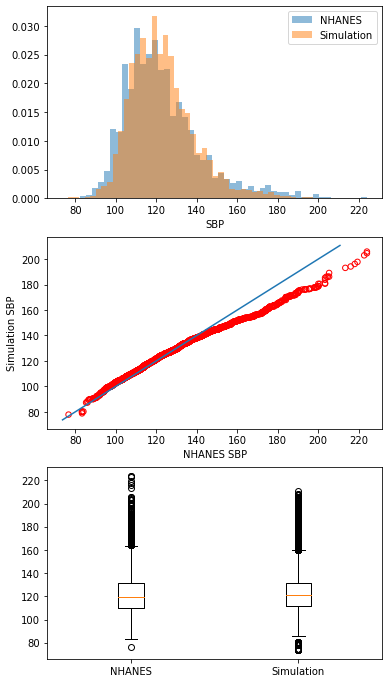

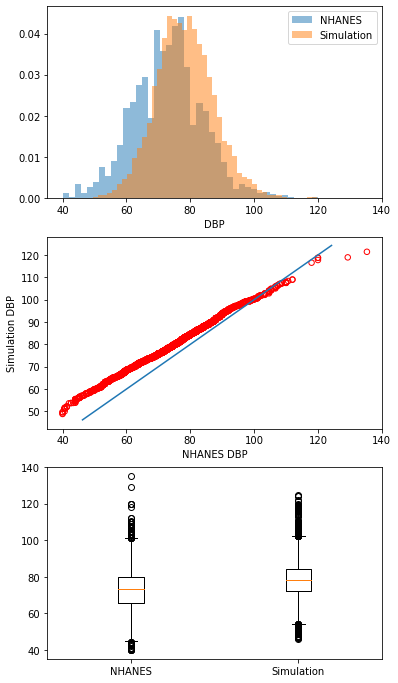

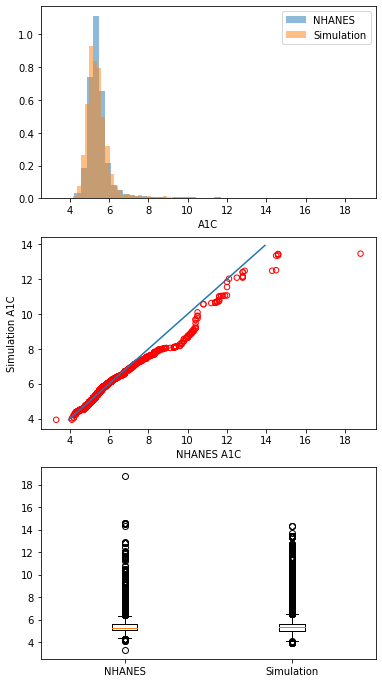

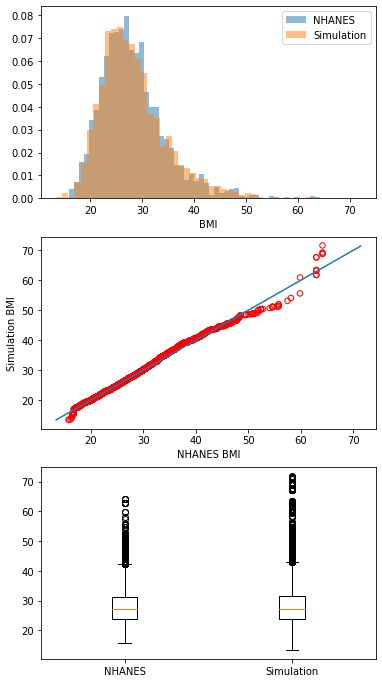

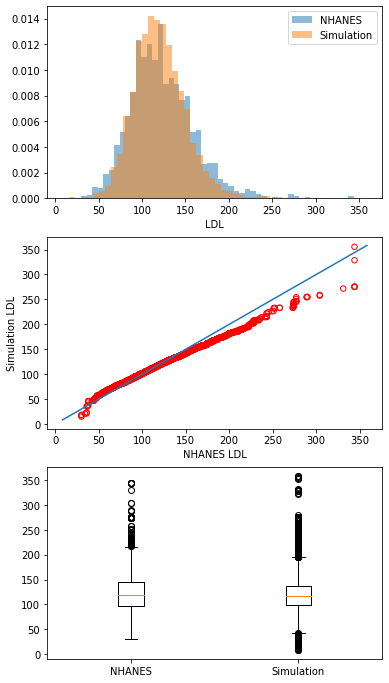

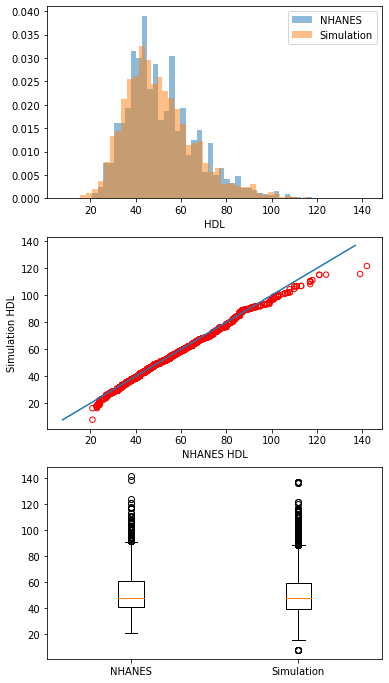

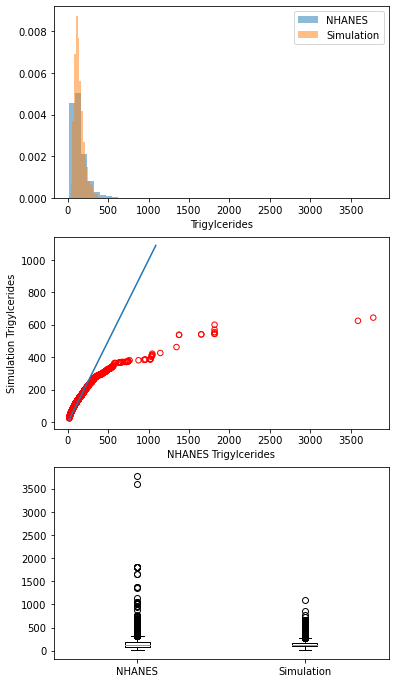

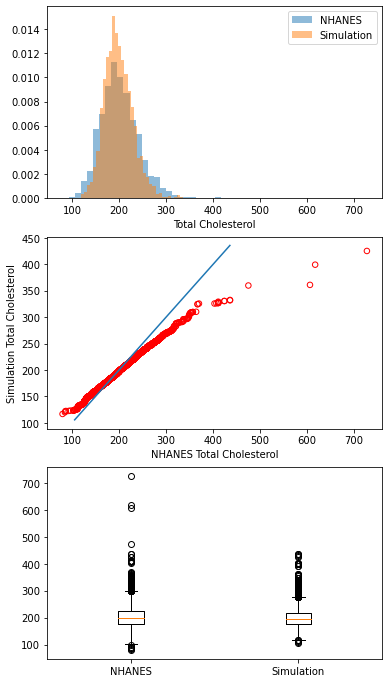

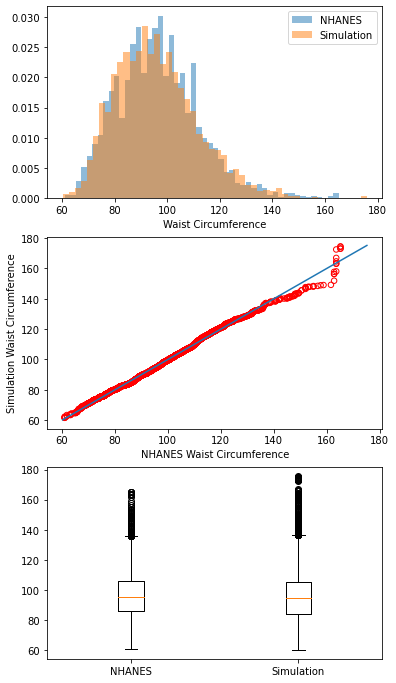

In [11]:
def addHistToAxis(attributeName, dfName, label, personAttributes, ax):
    ax.set_xlabel(label)
    ax.hist(earlyCrossSectionOfNonImmigrants[dfName], alpha=0.5, density=True, bins=50, label="NHANES")
    ax.hist(personAttributes, alpha=0.5, density=True, bins=50, label="Simulation")
    ax.legend()


def plotComparisonFigure(attributeName, dfName, label):

    personAttributes = pd.Series([ getattr(person, attributeName)[-1] for person in pop._people if not person.diedBy2015])


    fig, (ax1, ax2, ax3) = plt.subplots(3)

    fig.set_size_inches(6, 12)
    addHistToAxis(attributeName, dfName, label, personAttributes, ax1)
    print ("NHANES SBPS\n" + str(recentCrossSectionOfNonImmigrants[dfName].describe()))
    print("Simulation SBPs\n: " + str(personAttributes.describe()))
    ax2.scatter(earlyCrossSectionOfNonImmigrants[dfName].sort_values(), 
         personAttributes.sample(n=len(earlyCrossSectionOfNonImmigrants)).sort_values(), s=30, facecolors='none', edgecolors='r')
    ax2.set_ylabel(f"Simulation {label}")
    ax2.set_xlabel(f"NHANES {label}")
    plotRange = np.arange(personAttributes.min(),personAttributes.max())
    ax2.plot(plotRange, plotRange)

    ax3.boxplot([earlyCrossSectionOfNonImmigrants[dfName], personAttributes], labels=['NHANES', 'Simulation'])
    ax3.set_xlabel

    os.chdir("/Users/burke/Documents/research/bpCog/designAndMethodsPaper/figures/")
    plt.savefig(label + '.png')
    return fig, ax1, ax2, ax3

figureDescriptions = [('_sbp', 'meanSBP', 'SBP'), ('_dbp', 'meanDBP', 'DBP'),('_a1c', 'a1c', 'A1C'),
                     ('_bmi', 'bmi', 'BMI'), ('_ldl', 'ldl', 'LDL'), ('_hdl', 'hdl', 'HDL'),
                     ('_trig', 'trig', 'Trigylcerides'), ('_totChol', 'tot_chol', 'Total Cholesterol'),
                     ('_waist', 'waist', 'Waist Circumference')]

figs = []
hists = []
scatters = []
boxes = []

def saveFig(ax, fileName):
    fig = plt.savefig(fileName)


for desc in figureDescriptions:
    fig, hist, scatter, box = plotComparisonFigure(*desc)
    figs.append(fig)
    hists.append(hist)
    scatters.append(scatter)
    boxes.append(box)    
    saveFig(hist, desc[0] + "Hist.png")
    saveFig(scatter, desc[0] + "Scatter.png")
    saveFig(box, desc[0] + "Box.png")

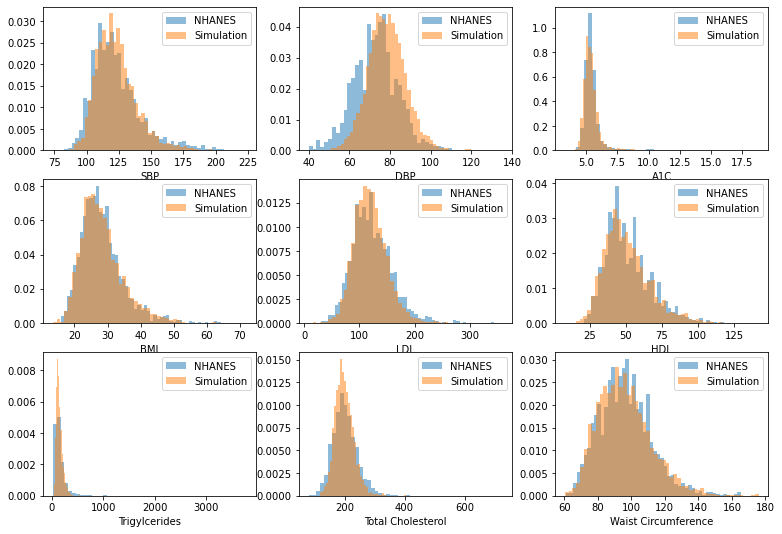

In [25]:
fig, axs = plt.subplots(3, 3)
fig.set_size_inches(13, 9)


row = 0
col = 0
for desc in figureDescriptions:
    personAttributes = pd.Series([ getattr(person, desc[0])[-1] for person in pop._people if not person.diedBy2015])
    addHistToAxis(*desc, personAttributes, axs[row, col])
    if (col+1) % 3 is 0:
        col=0
        row+= 1
    else:
        col+=1
    
plt.savefig('compositeRiskFactorHistogram.png')

In [16]:
3 % 3

0

In [75]:
hists[0]

In [76]:
fig.axes[0]

In [63]:
earlyCrossSectionOfNonImmigrants.head()

,index,WTINT2YR,a1c,age,antiHypertensive,bmi,diedBy2015,gender,hdl,ldl,monthsToDeath,monthsToDeath2,otherLipidLowering,selfReportMI,selfReportMIAge,selfReportStroke,selfReportStrokeAge,statin,timeInUS,tot_chol,trig,ucod,waist,weight,year,anyPhysicalActivity,meanSBP,meanDBP,alcoholPerWeek,raceEthnicity,smokingStatus,education
33394,33394,25845.884333,5.3,73.0,0.0,22.47,1.000000e+00,1.0,57.0,73.0,111.0,110.0,0.0,0,NaN,0,NaN,0.0,NaN,166.0,89.0,3,85.5,69.2,2001,1,138.666667,64.666667,7.0,3,1,5
30268,30268,85963.804502,4.8,39.0,1.0,37.15,5.397605e-79,2.0,44.0,113.0,131.0,130.0,0.0,0,NaN,0,NaN,0.0,NaN,208.0,91.0,0,101.3,96.9,2001,1,125.333333,89.333333,0.0,3,0,5
33531,33531,74874.410185,5.5,33.0,0.0,26.89,5.397605e-79,2.0,44.0,104.0,115.0,115.0,0.0,0,NaN,0,NaN,0.0,NaN,167.0,106.0,0,88.5,69.8,2001,1,113.333333,70.000000,7.0,3,0,3
34330,34330,47803.159784,5.4,21.0,0.0,29.94,5.397605e-79,1.0,43.0,111.0,110.0,109.0,0.0,0,NaN,0,NaN,0.0,NaN,179.0,125.0,0,99.6,98.4,2001,1,108.666667,68.000000,84.0,3,0,4
29447,29447,35236.674324,5.4,45.0,1.0,27.53,5.397605e-79,1.0,42.0,136.0,110.0,110.0,0.0,0,NaN,0,NaN,0.0,NaN,219.0,140.0,0,102.5,84.4,2001,1,124.666667,68.666667,14.0,3,2,3


Summary — SBP pressure predictions afgter 11 years look quite good. Mean is very close to the NHANES mean, variance is slightly reduced and there is slight underprediction on trhe very high end, but its not awful.

In fact, I think its close enough that I wouldn't recalibrate. Instead, I think we can see how we do when we add treatmetn...and if it holds up ok, then I think we're done and won't need recalibration.

meanSBP


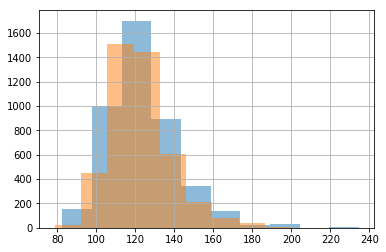

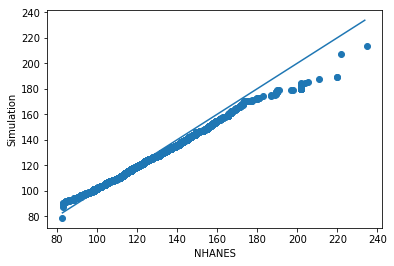

meanDBP


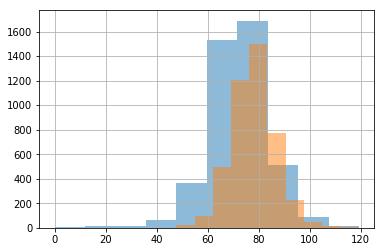

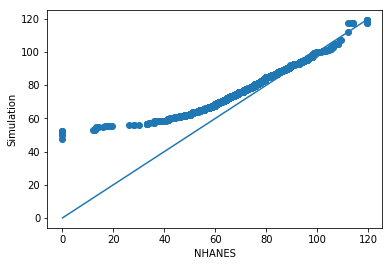

bmi


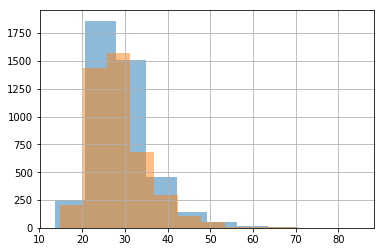

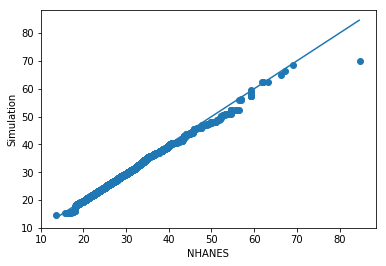

ldl


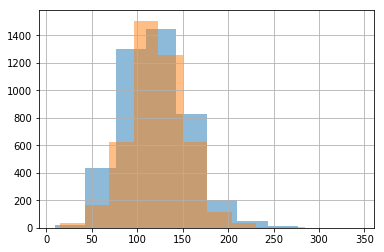

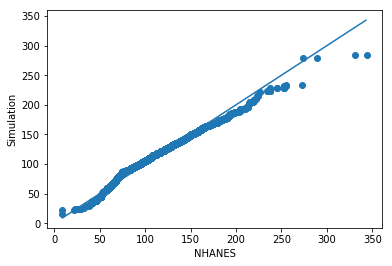

hdl


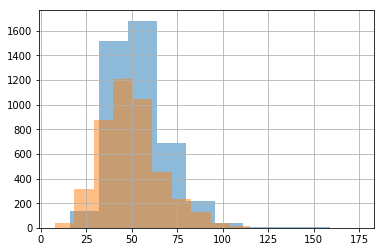

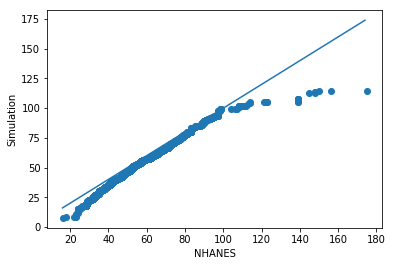

a1c


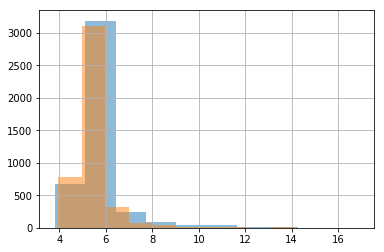

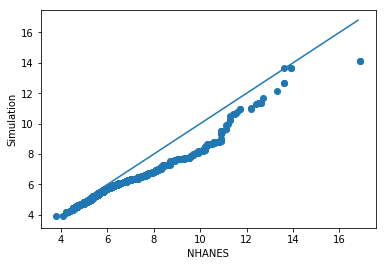

trig


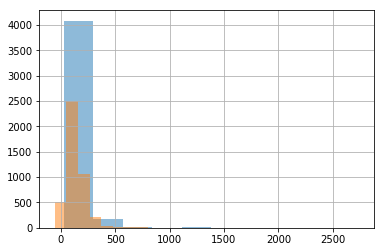

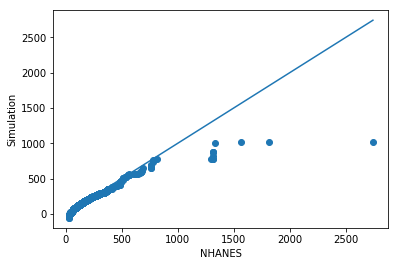

In [7]:
riskFactors = [("meanSBP", "sbp"), ("meanDBP", "dbp"), ("bmi", "bmi"), ("ldl", "ldl"), ("hdl", "hdl"), ("a1c", "a1c"), ("trig", "trig")]

def getRiskFactors(nhanesName, simName):
    nhanes = recentCrossSectionOfNonImmigrants[nhanesName]
    sim = [ getattr(person, "_" + simName)[-1] for person in pop._people if not person.diedBy2011]
    return (nhanes, pd.Series(sim))
    
for riskFactorTuple in riskFactors:
    print(riskFactorTuple[0])
    nhanes, sim = getRiskFactors(riskFactorTuple[0], riskFactorTuple[1])
    nhanes.hist(alpha=0.5)
    sim.hist(alpha=0.5)
    plt.show()
    
    plt.scatter(nhanes.sort_values(), 
     sim.sample(n=len(recentCrossSectionOfNonImmigrants)).sort_values())
    plt.plot(np.arange(nhanes.min(),nhanes.max()), np.arange(nhanes.min(), nhanes.max()))
    plt.xlabel("NHANES")
    plt.ylabel("Simulation")
    plt.show()
